<a href="https://colab.research.google.com/github/techfreckels/text/blob/master/Text_clustering_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
#id="4/yAGjhWQtqz33LknhSCW9dIDBjY_muvk2y7SVqN64BlXFN6pDExIaV3w"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
import warnings
import itertools
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sbn
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
import itertools
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

SMALL_SIZE = 8
MEDIUM_SIZE = 13
BIGGER_SIZE = 15
XL_SIZE = 15

plt.rc('font', size=MEDIUM_SIZE)          
plt.rc('axes', titlesize=BIGGER_SIZE)     
plt.rc('axes', labelsize=BIGGER_SIZE)   
plt.rcParams['axes.linewidth'] = 0 

plt.rc('xtick', labelsize=MEDIUM_SIZE)    
plt.rc('ytick', labelsize=MEDIUM_SIZE)    
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rcParams["figure.figsize"] = (16,8)

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.1

In [0]:
df= pd.read_excel("/content/drive/My Drive/Marra/crunchbase_export 09 04 2019 copia.xlsx", sheet_name="Funded Companies")

In [4]:
boston=df.loc[df['city'].isin(['Boston'])]
boston.head()
#aggiorno df a boston
df=boston
len(df)

1875

In [0]:
taglistdf=pd.DataFrame()
taglistdf["company_name"]=df["company_name"]
taglistdf["category_list"]=df["category_list"]
taglistdf["category_group_list"]=df["category_group_list"]
taglistdf["uuid"]=df["uuid"]

In [6]:
taglistdf.set_index("uuid")
taglistdf=taglistdf.dropna()#######
taglistdf["weights"] = np.empty((len(taglistdf), 0)).tolist()

taglistdf.head()

,company_name,category_list,category_group_list,uuid,weights
193,"Tarmin, Inc.",cloud computing|cloud data services|informatio...,information technology|internet services|priva...,518793df-386f-a835-b453-0aa0eb9fdec8,[]
339,ezCater,hospitality|marketplace|restaurants,commerce and shopping|food and beverage|travel...,75a5cbfd-85e0-5f78-6364-585543a70dd9,[]
494,Toast,analytics|mobile|point of sale|restaurants|saa...,commerce and shopping|data and analytics|food ...,4157109f-9e72-688c-a124-359da8c89ba9,[]
688,Lola.com,business travel|software,software|travel and tourism,6643bcd7-5177-4c14-7008-47d3655e6ac9,[]
829,HomeProvider,home services|property management,real estate,1726d040-9ecd-4bf3-b102-298d9ae9f053,[]


In [7]:
cnt=0
taglist=[]
for index, row in taglistdf.iterrows():
  a=(str(row["category_list"])+"|"+str(row["category_group_list"])).split("|")
  a=set(a)
  taglist.append(a)

taglistdf["taglist"]=taglist
taglistdf["taglist"].head()
taglistdf.head()


,company_name,category_list,category_group_list,uuid,weights,taglist
193,"Tarmin, Inc.",cloud computing|cloud data services|informatio...,information technology|internet services|priva...,518793df-386f-a835-b453-0aa0eb9fdec8,[],"{cloud computing, cloud data services, securit..."
339,ezCater,hospitality|marketplace|restaurants,commerce and shopping|food and beverage|travel...,75a5cbfd-85e0-5f78-6364-585543a70dd9,[],"{restaurants, food and beverage, hospitality, ..."
494,Toast,analytics|mobile|point of sale|restaurants|saa...,commerce and shopping|data and analytics|food ...,4157109f-9e72-688c-a124-359da8c89ba9,[],"{restaurants, point of sale, software, mobile,..."
688,Lola.com,business travel|software,software|travel and tourism,6643bcd7-5177-4c14-7008-47d3655e6ac9,[],"{business travel, travel and tourism, software}"
829,HomeProvider,home services|property management,real estate,1726d040-9ecd-4bf3-b102-298d9ae9f053,[],"{property management, real estate, home services}"


In [0]:
uniquewords=[]
taglist=taglistdf["taglist"]########

for company in taglist:
  for term in company:
    uniquewords.append(term)

from collections import Counter
TermInDocs = Counter(uniquewords)
#print(TermInDocs)
uniquewords=list(set(uniquewords))##TAG UNICI: 536
#uniquewords##################

In [9]:
import math
cnt=0
collection=list()

for index, row in taglistdf.iterrows():
  length=len(row["taglist"])
  cnt+=1
 
  termWeight = dict.fromkeys(uniquewords,0 )
 
  for tag in row["taglist"]:
    #print(len(row["taglist"]))
    DF=TermInDocs[tag]
    termWeight[tag]=(1/length)*math.log(len(taglistdf)*(1/DF))
  
  row["weights"]=termWeight

#cnt=0
ddf = pd.DataFrame(columns=taglistdf["weights"].iloc[0])
for (i,r) in taglistdf.iterrows():
  for k, v in r["weights"].items():
    #ddf[k].iloc[i]=v   
    ddf.set_value(i,k,v)
    #cnt+=1

ddf.shape

(1809, 535)

In [10]:
!pip install hdbscan

     |████████████████████████████████| 4.7MB 5.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2361266 sha256=598c4cb4b2cc8f7c9fca4c53365be1a5986017022f75eb2e150d97015deecd02
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


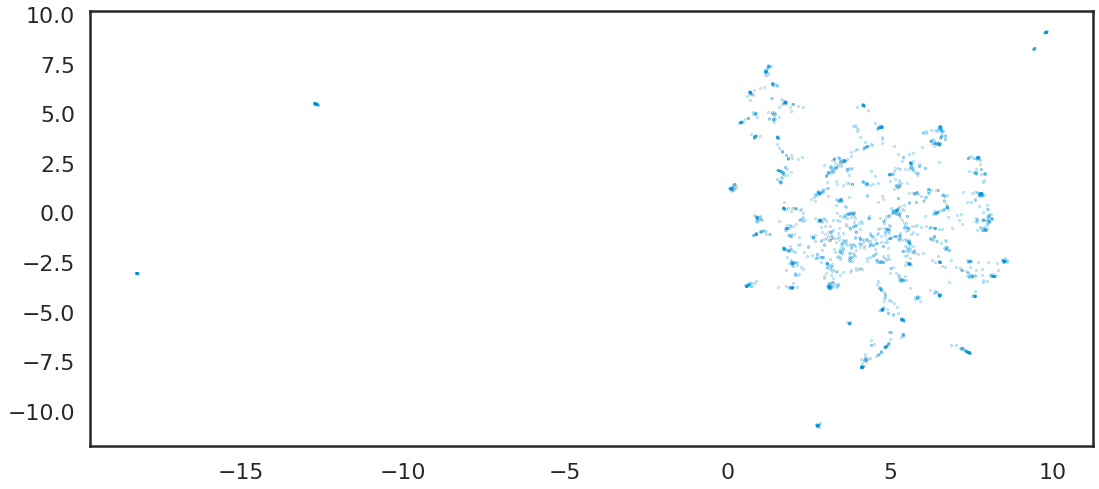

In [32]:
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
import umap 

distance_matrix = pairwise_distances(ddf, ddf, metric='cosine', n_jobs=-1)
#model = TSNE(metric="precomputed",random_state=33,perplexity=70)
model = umap.UMAP(metric="precomputed",random_state=4545)
#model=PCA(n_components=2)
Xpr = model.fit_transform(distance_matrix)
#Xpr = umap.UMAP(random_state=42).fit_transform(distance_matrix)
plt.scatter(Xpr[:, 0], Xpr[:, 1], s=0.1, cmap='Spectral');
#
mmx=MinMaxScaler()
X = mmx.fit_transform(Xpr)
x = []
y=[]
for i in range(0,len(X)):
    x.append(X[i][0])
    y.append(X[i][1])

In [40]:
import hdbscan
hdb= hdbscan.HDBSCAN(gen_min_span_tree=True, prediction_data=True, min_cluster_size =40,min_samples=1, ).fit(X)
#min_samples=5,
hcore_samples_mask = np.zeros_like(hdb.labels_, dtype=bool)
hlabels = hdb.labels_
hn_clusters_ = len(set(hlabels)) - (1 if -1 in hlabels else 0)

hunique_labels = set(hlabels)
len(Xpr)

1809

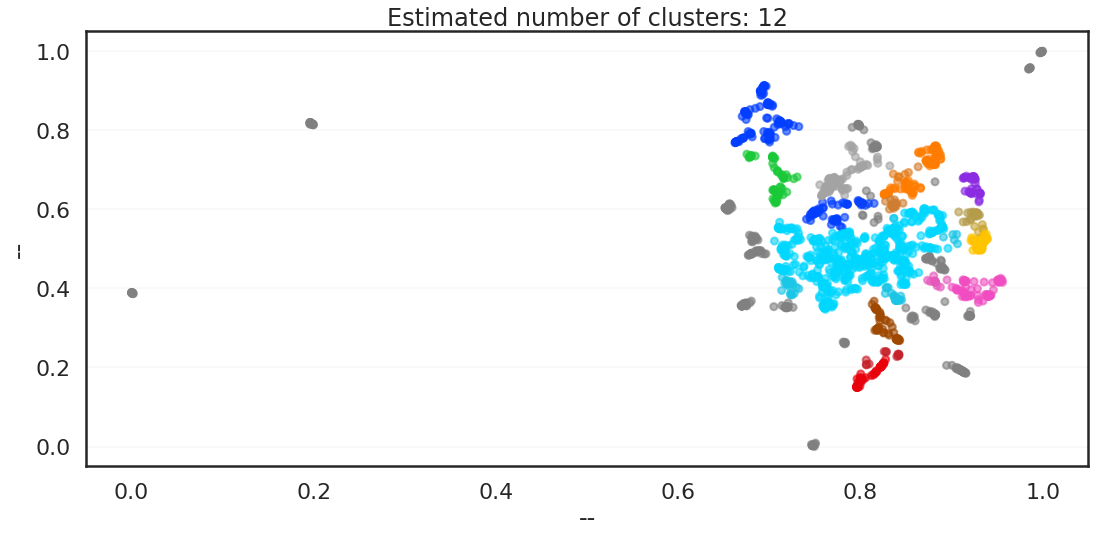

In [41]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}


color_palette = sns.color_palette('bright', 150)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in hdb.labels_]

cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, hdb.probabilities_)]

plt.title('Estimated number of clusters: %d' % hn_clusters_)

plt.xlabel('--')
plt.ylabel('--')

plt.grid(True)
plt.rcParams['grid.color'] = "#222222"

axes = plt.gca()
axes.xaxis.grid(linestyle=':', linewidth='0', color='gray')

plt.scatter(*X.T, s=50, c=cluster_member_colors, alpha=0.6)

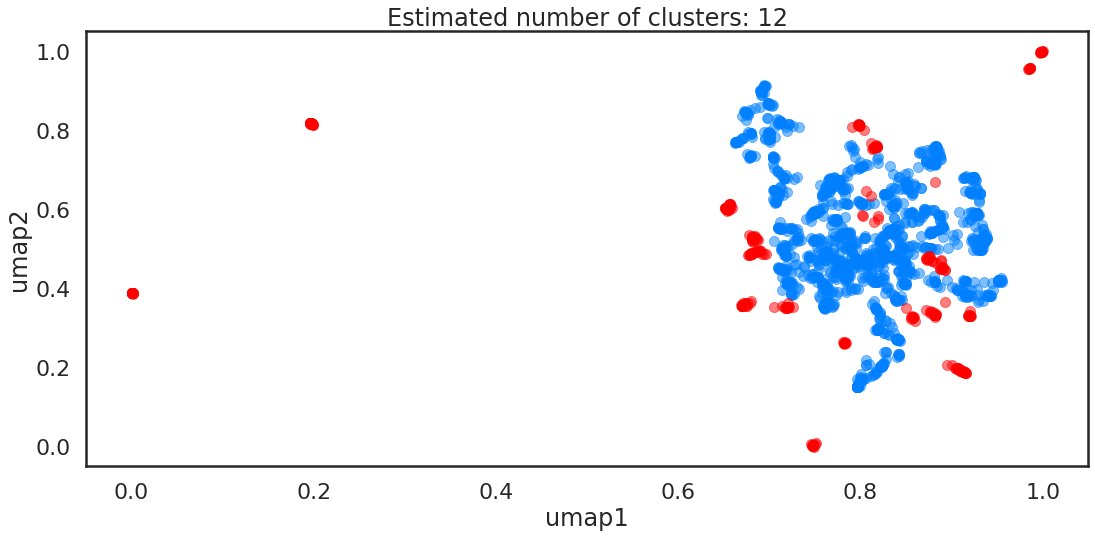

In [42]:
for k in hunique_labels:
    col=[0,0.5,1,1]
    if k == -1:
        col = [1, 0, 0, 1]
    hclass_member_mask = (hlabels == k)
    
    xy = X[hclass_member_mask & hcore_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=tuple(col),markersize=10, alpha=0.5)

    xy = X[hclass_member_mask & ~hcore_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=tuple(col), markersize=10, alpha=0.5)

plt.title('Estimated number of clusters: %d' % hn_clusters_)
plt.xlabel('umap1')
plt.ylabel('umap2')
axes = plt.gca()
axes.xaxis.grid(linestyle=':', linewidth='0', color='gray')
#plt.show()



In [0]:
taglistdf["cluster"]=hdb.labels_
clusters=set(hdb.labels_)

In [44]:
taglistdf.head()


,company_name,category_list,category_group_list,uuid,weights,taglist,cluster,pointX,pointY,clusterStr
0,"Tarmin, Inc.",cloud computing|cloud data services|informatio...,information technology|internet services|priva...,518793df-386f-a835-b453-0aa0eb9fdec8,"{'employment': 0, 'data integration': 0, 'prod...","{cloud computing, cloud data services, securit...",8,0.915431,0.436675,12
1,ezCater,hospitality|marketplace|restaurants,commerce and shopping|food and beverage|travel...,75a5cbfd-85e0-5f78-6364-585543a70dd9,"{'employment': 0, 'data integration': 0, 'prod...","{restaurants, food and beverage, hospitality, ...",7,0.749960,0.549355,9
2,Toast,analytics|mobile|point of sale|restaurants|saa...,commerce and shopping|data and analytics|food ...,4157109f-9e72-688c-a124-359da8c89ba9,"{'employment': 0, 'data integration': 0, 'prod...","{restaurants, point of sale, software, mobile,...",9,0.827976,0.411910,18
3,Lola.com,business travel|software,software|travel and tourism,6643bcd7-5177-4c14-7008-47d3655e6ac9,"{'employment': 0, 'data integration': 0, 'prod...","{business travel, travel and tourism, software}",10,0.747847,0.495470,13
4,HomeProvider,home services|property management,real estate,1726d040-9ecd-4bf3-b102-298d9ae9f053,"{'employment': 0, 'data integration': 0, 'prod...","{property management, real estate, home services}",4,0.911655,0.560741,10


In [0]:
taglistdf["pointX"]=X[:,0]

In [0]:
taglistdf["pointY"]=X[:,1]

In [47]:
taglistdf.head()


,company_name,category_list,category_group_list,uuid,weights,taglist,cluster,pointX,pointY,clusterStr
0,"Tarmin, Inc.",cloud computing|cloud data services|informatio...,information technology|internet services|priva...,518793df-386f-a835-b453-0aa0eb9fdec8,"{'employment': 0, 'data integration': 0, 'prod...","{cloud computing, cloud data services, securit...",8,0.926926,0.503653,12
1,ezCater,hospitality|marketplace|restaurants,commerce and shopping|food and beverage|travel...,75a5cbfd-85e0-5f78-6364-585543a70dd9,"{'employment': 0, 'data integration': 0, 'prod...","{restaurants, food and beverage, hospitality, ...",7,0.763407,0.645354,9
2,Toast,analytics|mobile|point of sale|restaurants|saa...,commerce and shopping|data and analytics|food ...,4157109f-9e72-688c-a124-359da8c89ba9,"{'employment': 0, 'data integration': 0, 'prod...","{restaurants, point of sale, software, mobile,...",9,0.827054,0.490066,18
3,Lola.com,business travel|software,software|travel and tourism,6643bcd7-5177-4c14-7008-47d3655e6ac9,"{'employment': 0, 'data integration': 0, 'prod...","{business travel, travel and tourism, software}",10,0.749184,0.596529,13
4,HomeProvider,home services|property management,real estate,1726d040-9ecd-4bf3-b102-298d9ae9f053,"{'employment': 0, 'data integration': 0, 'prod...","{property management, real estate, home services}",4,0.931310,0.641626,10


In [0]:
# x and y given as DataFrame columns
import plotly.express as px
#df = px.data.iris() # iris is a pandas DataFrame
taglistdf["clusterStr"]=taglistdf["cluster"].astype(str)

figa = px.scatter(taglistdf.loc[taglistdf['cluster'] != -1], x="pointX", y="pointY",color="clusterStr",range_color=[0,15])
#fig.show()

In [0]:
#taglistdf.loc[~taglistdf['cluster'].isin(-1)]
taglistdf.loc[taglistdf['cluster'] != -1]
clus1=taglistdf.loc[taglistdf['cluster'] == 1]

In [0]:
#taglistdf.shape

In [0]:
#ddf.head()

In [52]:
taglistdf.reset_index(drop=True, inplace=True)#CONTROLLARE IL DROPNA SOPRA
ddf.reset_index(drop=True, inplace=True)
complete=pd.concat([taglistdf, ddf],axis=1)
complete.head()



,company_name,category_list,category_group_list,uuid,weights,taglist,cluster,pointX,pointY,clusterStr,employment,data integration,productivity tools,medical,innovation management,wellness,software engineering,b2c,isp,brand marketing,advanced materials,communities,social crm,social media advertising,agriculture,consumer goods,transaction processing,big data,developer platform,wearables,commercial,craft beer,rental property,audio,online portals,career planning,fruit,home decor,speech recognition,nursing and residential care,...,life science,mobile devices,non profit,privacy and security,biometrics,sms,photo sharing,home health care,navigation and mapping,nutrition,vacation rental,social news,fraud detection,identity management,machinery manufacturing,language learning,agriculture and farming,legal tech,business development,mapping services,online forums,hockey,flash storage,financial services,consumer software,ad targeting,banking,professional networking,pharmaceutical,higher education,food trucks,clean energy,association,security,shipping,celebrity,venture capital,web development,aquaculture,fitness
0,"Tarmin, Inc.",cloud computing|cloud data services|informatio...,information technology|internet services|priva...,518793df-386f-a835-b453-0aa0eb9fdec8,"{'employment': 0, 'data integration': 0, 'prod...","{cloud computing, cloud data services, securit...",8,0.926926,0.503653,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.479628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.580935,0,0,0,0,0,0
1,ezCater,hospitality|marketplace|restaurants,commerce and shopping|food and beverage|travel...,75a5cbfd-85e0-5f78-6364-585543a70dd9,"{'employment': 0, 'data integration': 0, 'prod...","{restaurants, food and beverage, hospitality, ...",7,0.763407,0.645354,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Toast,analytics|mobile|point of sale|restaurants|saa...,commerce and shopping|data and analytics|food ...,4157109f-9e72-688c-a124-359da8c89ba9,"{'employment': 0, 'data integration': 0, 'prod...","{restaurants, point of sale, software, mobile,...",9,0.827054,0.490066,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Lola.com,business travel|software,software|travel and tourism,6643bcd7-5177-4c14-7008-47d3655e6ac9,"{'employment': 0, 'data integration': 0, 'prod...","{business travel, travel and tourism, software}",10,0.749184,0.596529,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HomeProvider,home services|property management,real estate,1726d040-9ecd-4bf3-b102-298d9ae9f053,"{'employment': 0, 'data integration': 0, 'prod...","{property management, real estate, home services}",4,0.931310,0.641626,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
import plotly.graph_objects as go

# Change the bar mode
#fig.update_layout(barmode='group'
graph = []
cnt=0
figa.show()
for c in clusters:
  #print("\n------------- cluster ",c," ---------------")
  clus=complete.loc[complete['cluster'] == c]
  idx=clus.columns.get_loc("cluster")
  clus = clus.iloc[ : ,idx+4:complete.shape[0]]

  s=clus.sum(axis=0)
  s=s[s > 0]
  s=(s.sort_values(ascending=False))
  #print(s[clus.columns])
  
  #print(s.name)
  x = s.keys()[:30]
  y = s[:30]
  #graph.append({"keys":[s.keys()[:40]],"series": s[:40],"cnt":cnt})
  
  #graph["keys"].append(s.keys()[:40])
  #graph["series"].append(s[:40])

# Use textposition='auto' for direct text
  fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto'
        )])

  #fig = go.Figure(data=[go.Pie(labels=s.keys()[:10], values=s[:10])])
  #print(s.keys()[:5])
  fig.update_layout(title_text="Cluster: " + str(c) +" - members: "+ str(len(s)))

  fig.show()

In [0]:
import plotly.graph_objects as go

graph = []
cnt=0
fig = go.Figure()

for c in clusters:
  clus=complete.loc[complete['cluster'] == c]
  idx=clus.columns.get_loc("cluster")
  clus = clus.iloc[ : ,idx+4:complete.shape[0]]


  s=clus.sum(axis=0)
  s=s[s > 0]
  s=(s.sort_values(ascending=False))
  #print(s[clus.columns])
  
  #print(s.name)
  x = s.keys()[:20]
  y = s[:20]

  if (cnt==0):
    thetat = x
 
  cnt+=1

  fig.add_trace(go.Scatterpolar(
      r=y,
      theta=thetat,
      fill='toself',
      name="Cluster "+str(c)
      ))

  fig.update_layout(
    polar=dict(
      radialaxis=dict(
        visible=True
      ),
    ),
    showlegend=True
  )

fig.show()